<a href="https://colab.research.google.com/github/shakuntala123/ML/blob/main/WeatherForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE REQUIRED LIBRARIES**










In [ ]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O


In [ ]:

import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
import scipy  #scientific and technical computations
import re  #regular expressions -pattern matching and text processing
import missingno as mso #visualizing missing data
from scipy import stats #statistical functions
from scipy.stats import ttest_ind #statistical test for comparing the means of two groups.
from scipy.stats import pearsonr #Pearson correlation coefficient
from sklearn.preprocessing import StandardScaler,LabelEncoder #standardizing feature variables ,convert categorical labels into numeric labels
from sklearn.model_selection import train_test_split #splitting a dataset into training and testing
from sklearn.neighbors import KNeighborsClassifier # create a KNN
from sklearn.svm import SVC #classification
from sklearn.ensemble import GradientBoostingClassifier #gradient boosting
from xgboost import XGBClassifier # gradient boosting
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, ReLU, Softmax, Dropout
from tensorflow.keras.optimizers.legacy import SGD, Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy, AUC
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, auc, confusion_matrix, classification_report

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**ANALYSING THE DATASET**

In [ ]:
data=pd.read_csv("/content/india-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,15-07-2019,0.0,12.8,5.0,4.7,drizzle
1,16-07-2019,10.9,10.6,2.8,4.5,rain
2,17-07-2019,0.8,11.7,7.2,2.3,rain
3,18-07-2019,20.3,12.2,5.6,4.7,rain
4,19-07-2019,1.3,8.9,2.8,6.1,rain


In [ ]:
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,10-07-2023,8.6,4.4,1.7,2.9,rain
1457,11-07-2023,1.5,5.0,1.7,1.3,rain
1458,12-07-2023,0.0,7.2,0.6,2.6,fog
1459,13-07-2023,0.0,5.6,-1.0,3.4,sun
1460,14-07-2023,0.0,5.6,-2.1,3.5,sun


In [ ]:
data.shape

(1461, 6)

**DATA EXPLORATION**

<Axes: xlabel='weather', ylabel='count'>

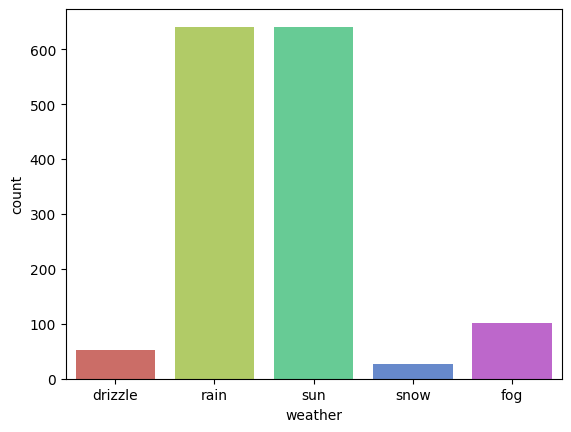

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.countplot(x="weather", data=data, palette="hls")


In [ ]:
countrain=len(data[data.weather=="rain"])
countsun=len(data[data.weather=="sun"])
countdrizzle=len(data[data.weather=="drizzle"])
countsnow=len(data[data.weather=="snow"])
countfog=len(data[data.weather=="fog"])
print("Percent of Rain:{:2f}%".format((countrain/(len(data.weather))*100)))
print("Percent of Sun:{:2f}%".format((countsun/(len(data.weather))*100)))
print("Percent of Drizzle:{:2f}%".format((countdrizzle/(len(data.weather))*100)))
print("Percent of Snow:{:2f}%".format((countsnow/(len(data.weather))*100)))
print("Percent of Fog:{:2f}%".format((countfog/(len(data.weather))*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


**NUMERICAL OR CONTINUOUS VARIABLES**

In [ ]:
data[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


FINDING THE OUTILERS OR SKEW IN DATA SET







<Axes: xlabel='wind', ylabel='Count'>

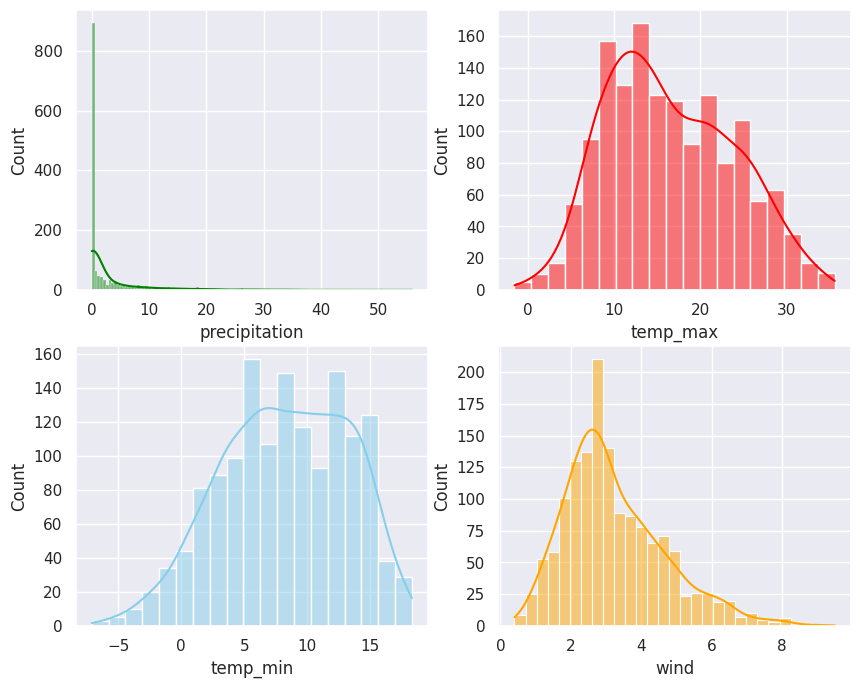

In [ ]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

<Axes: xlabel='wind'>

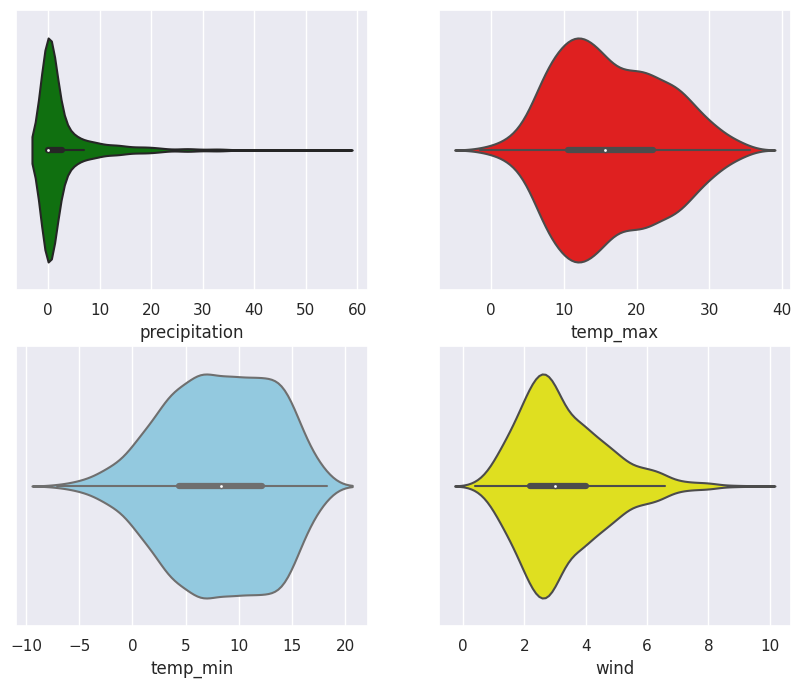

In [ ]:

sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=data,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=data,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=data,x="wind",kde=True,ax=axs[1,1],color='yellow')

**SKEWNESS USING BOXPLOT**

<Axes: xlabel='precipitation', ylabel='weather'>

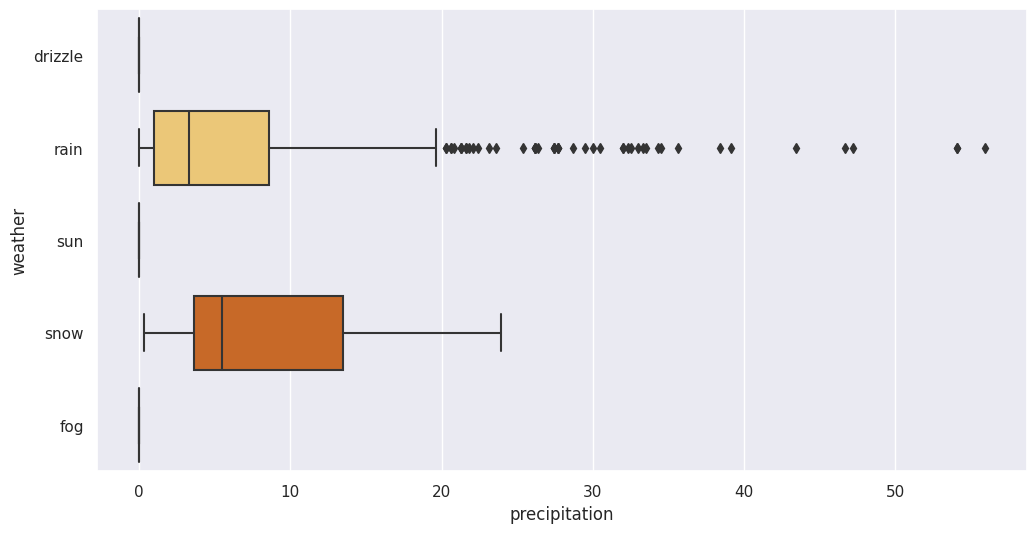

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="precipitation", y="weather", data=data, palette="YlOrBr")


<Axes: xlabel='wind', ylabel='weather'>

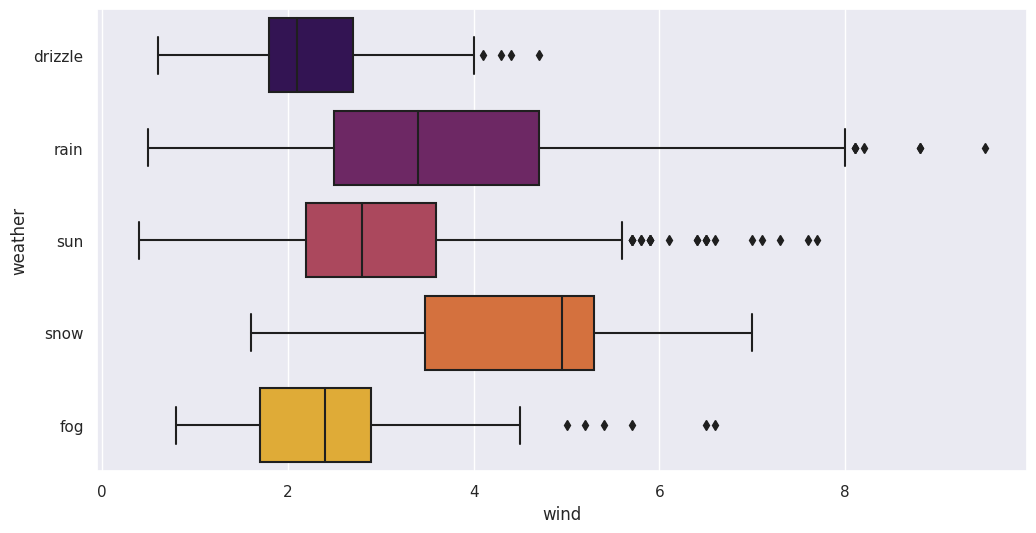

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="wind", y="weather", data=data, palette="inferno")



**HEATMAP**

<Axes: >

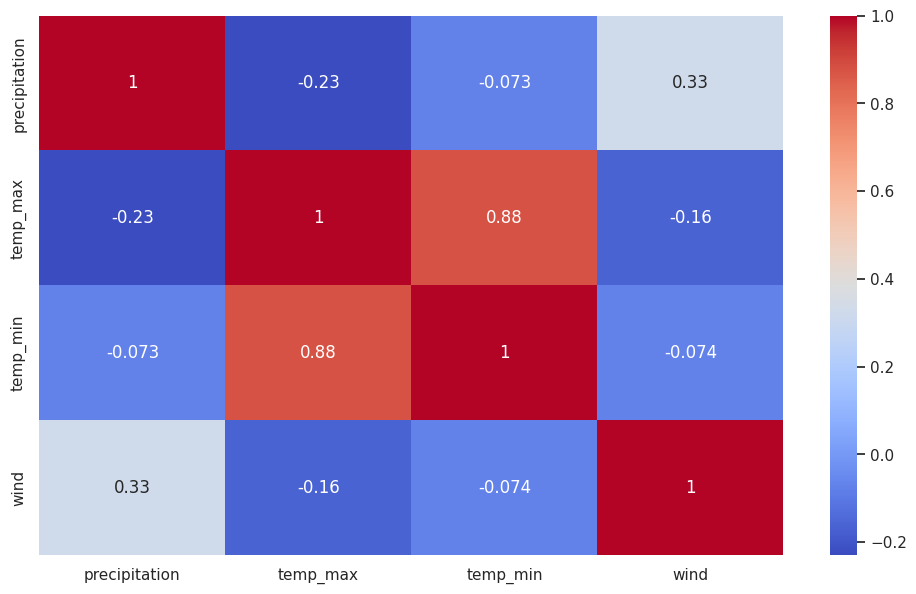

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

Pearson correlation: -0.22855481643297046
T Test and P value: TtestResult(statistic=-51.60685279531918, pvalue=0.0, df=2920.0)


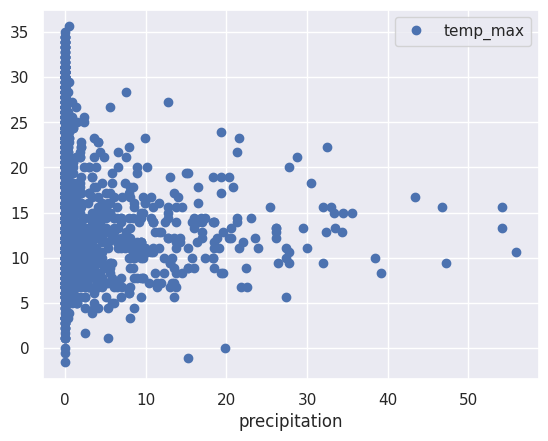

In [ ]:
data.plot("precipitation","temp_max",style='o')
print("Pearson correlation:",data["precipitation"].corr(data["temp_max"]))
print("T Test and P value:",stats.ttest_ind(data["precipitation"],data["temp_max"]))

Pearson correlation: -0.16485663487495486
T Test and P value: TtestResult(statistic=-67.3601643301846, pvalue=0.0, df=2920.0)


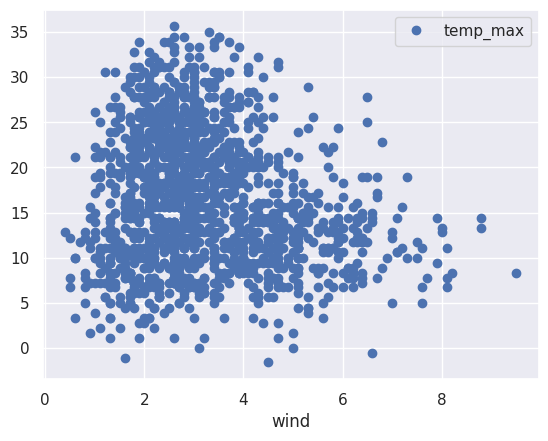

In [ ]:
data.plot("wind","temp_max",style='o')
print("Pearson correlation:",data["wind"].corr(data["temp_max"]))
print("T Test and P value:",stats.ttest_ind(data["wind"],data["temp_max"]))

<Axes: xlabel='temp_max'>

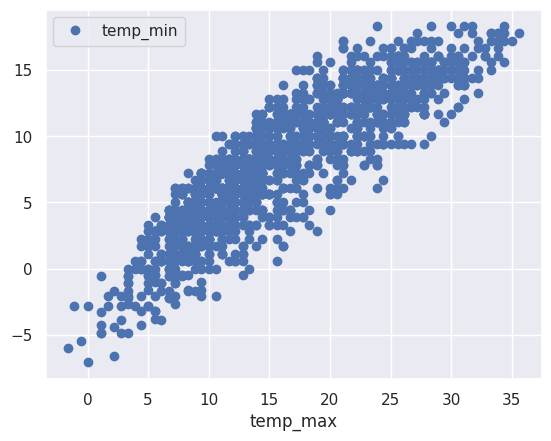

In [ ]:
data.plot("temp_max","temp_min",style='o')

**NULL VALUES**

In [ ]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

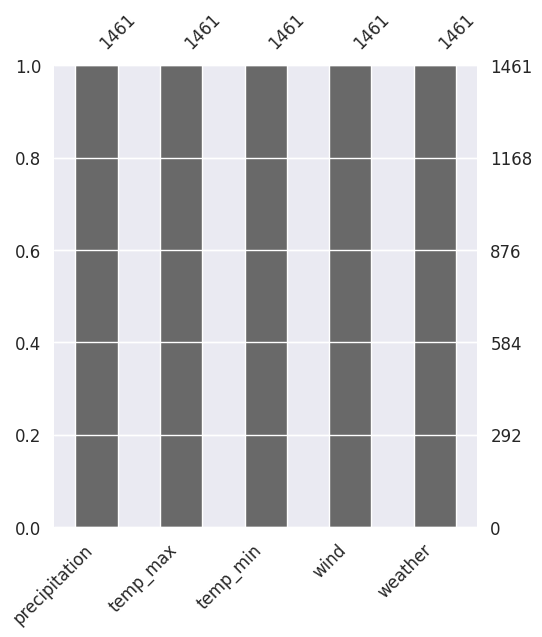

In [ ]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(data.drop(["date"],axis=1),ax=axz,fontsize=12);

**DATA PREPROCESSING**

In [ ]:
#Drop Unnecessary Variables
df=data.drop(["date"],axis=1)

In [ ]:
#Remove Outliers & Infinite Values
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [ ]:
#Skewed Distribution Treatment
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

<Axes: xlabel='wind', ylabel='Count'>

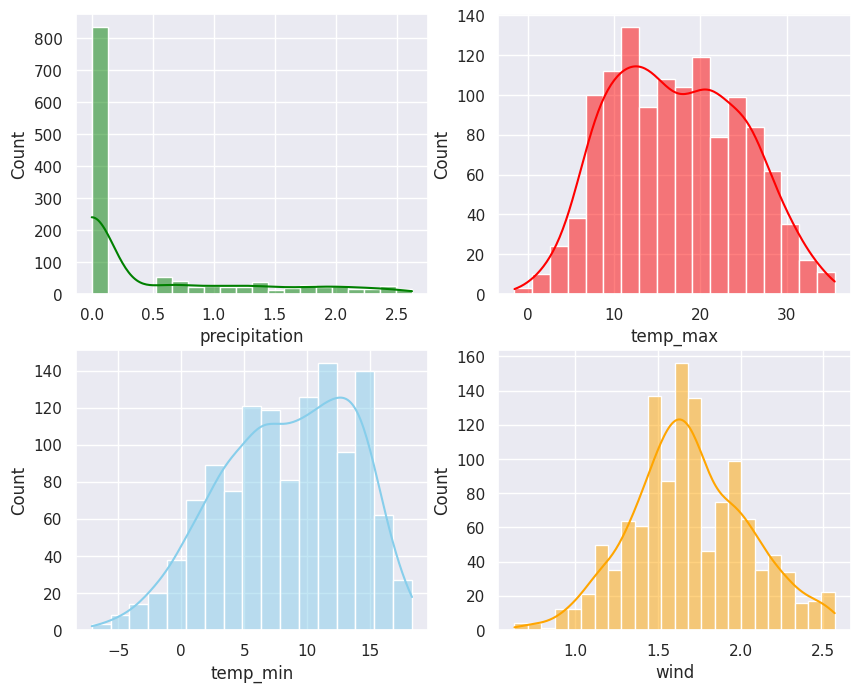

In [ ]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')

In [ ]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
2,0.894427,11.7,7.2,1.516575,rain
4,1.140175,8.9,2.8,2.469818,rain
5,1.581139,4.4,2.2,1.483240,rain
6,0.000000,7.2,2.8,1.516575,rain


In [ ]:
#Scaling the weather variables using label Encoder
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])

In [ ]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
2,0.894427,11.7,7.2,1.516575,2
4,1.140175,8.9,2.8,2.469818,2
5,1.581139,4.4,2.2,1.483240,2
6,0.000000,7.2,2.8,1.516575,2


SPLITTING THE DATASET INTO DEPENDANT AND INDEPENDANT VARIABLES

In [ ]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values

In [ ]:
df.weather.unique()

array([0, 2, 4, 3, 1])

**ALGORITHMS AND MODEL TRAINING**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [ ]:
#K-NEAREST NEIGHBOR CLASSIFIER
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:75.00%


In [ ]:
#SUPPORT VECTOR MACHINE - CLASSIFIER
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))

SVM Accuracy:77.42%


In [ ]:
#GRADIENT BOOSTING CLASSIFIER
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print("Gradient Boosting Accuracy:{:.2f}%".format(gbc.score(x_test,y_test)*100))


Gradient Boosting Accuracy:81.45%


In [ ]:
#EXTREME GRADIENT BOOSTING OR XGBCLASSIFIER
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))

XGB Accuracy:82.26%


CHECKING FOR THE USER INPUT

In [ ]:
data=[[17,10,0,9.8]]
ot=xgb.predict(data)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
   print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is:
snow


In [ ]:
# Get user input for weather features
user_input = input("Enter weather features (comma-separated values): ")
weather_features = [float(val) for val in user_input.split(',')]

# Reshape the input for prediction
# Since plain lists don't have a reshape method, we can use a list of lists for a similar effect
input_data = [weather_features]

# Make the prediction
predicted_class = xgb.predict(input_data)[0]

# Map the predicted class to weather conditions
weather_conditions = ["Drizzle", "Fog", "Rain", "Snow", "Sun"]
predicted_weather = weather_conditions[predicted_class]

# Print the predicted weather
print("The weather is:", predicted_weather)


Enter weather features (comma-separated values): 12 , 23, 45.6,20
The weather is: Rain


In [ ]:
data = pd.read_csv("/content/india-weather.csv")
data, raw_label = data.iloc[:, :-1], data.iloc[:, -1]

for c in pd.unique(raw_label):
    print(f"{c}: ", (raw_label==c).sum())

data[['precipitation']] = data[['precipitation']].fillna(value=data[['precipitation']].mean())
data[['temp_max']] = data[['temp_max']].fillna(value=data[['temp_max']].mean())
data[['temp_min']] = data[['temp_min']].fillna(value=data[['temp_min']].mean())
data[['wind']] = data[['wind']].fillna(value=data[['wind']].mean())

# Date are split and one hot encoded

data["date"] = pd.to_datetime(data["date"])
data["month"] = data["date"].dt.month
data["day"] = data["date"].dt.day
data.drop(inplace=True, columns=["date"])

encoder = OneHotEncoder(sparse=False)
encoder.fit(data[['month', 'day']])
encoded_month_day = encoder.transform(data[['month', 'day']])
data.drop(inplace=True, columns=["month"])
data.drop(inplace=True, columns=["day"])

data = np.asarray(data)
date_data = np.asarray(encoded_month_day)
data = np.concatenate([data, date_data], axis=-1)

# Label Encoded
label_enc = LabelEncoder()
label = label_enc.fit_transform(raw_label)
print(label_enc.classes_)
label_ohe = np.eye(label.shape[0], len(pd.unique(label)))[label]
X_train, X_test, y_train, y_test = train_test_split(data, label_ohe, test_size=0.3, random_state=49)

drizzle:  53
rain:  641
sun:  640
snow:  26
fog:  101
['drizzle' 'fog' 'rain' 'snow' 'sun']


In [ ]:
def WeatherClassifier(num_features, dnn_sizes, num_classes:int):
    input_layer = keras.layers.Input(shape=(num_features))
    dnn_1 = Dense(units=dnn_sizes[0], activation='tanh')(input_layer)
    dropout_1 = Dropout(rate=0.1)(dnn_1)
    dnn_2 = Dense(units=dnn_sizes[1], activation='tanh')(dropout_1)
    dropout_2 = Dropout(rate=0.2)(dnn_2)
    dnn_3 = Dense(units=dnn_sizes[2], activation='tanh')(dropout_2)
    output = Dense(units=num_classes, activation="softmax")(dnn_3)
    return Model(inputs=input_layer, outputs=output)


early_stopper = EarlyStopping(monitor='loss', patience = 10, verbose = 1)

model = WeatherClassifier(num_features=X_train.shape[-1], dnn_sizes=[64, 64, 64],
                          num_classes=len(pd.unique(label)))

#training
model.compile(optimizer = Adam(learning_rate = 1.e-4),
              loss = CategoricalCrossentropy(from_logits=False),
              metrics = [AUC(), CategoricalAccuracy()])


model.fit(x=X_train, y=y_train, epochs=500, verbose=False,
          callbacks=[early_stopper])

preds = model.predict(X_test)
preds = tf.argmax(preds, axis=-1).numpy()

y_true = np.argmax(y_test, axis=-1)
conf_mat = confusion_matrix(y_true, preds)
acc = accuracy_score(y_true, preds)

print(label_enc.classes_)
print(conf_mat)
print(f"Test Accuracy: {acc}")
print(classification_report(preds, y_true))

Epoch 89: early stopping
14/14 [==============================] - 0s 2ms/step
['drizzle' 'fog' 'rain' 'snow' 'sun']
[[  0   0   1   0  16]
 [  0   0   0   0  26]
 [  0   0 177   0  13]
 [  0   0   8   4   0]
 [  0   0   4   0 190]]
Test Accuracy: 0.8451025056947609
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.93      0.93      0.93       190
           3       0.33      1.00      0.50         4
           4       0.98      0.78      0.87       245

    accuracy                           0.85       439
   macro avg       0.45      0.54      0.46       439
weighted avg       0.95      0.85      0.89       439

